## 1. Background Problem

Dataset : Uber vs Lyft

Objective : Uber dan Lyft merupakan sebuah aplikasi transportasi secara online. Uber didirikan pada 2009 oleh Travis Kalanick dan Garrett Camp sebagai UberCab. Setelah pengunduran diri Kalanick sebagai CEO pada tahun 2017, Dara Khosrowshahi menggantikannya. Ronald Sugar diangkat sebagai ketua pada Agustus 2018. Kalanick tetap menjadi anggota dewan direksi perusahaan. 
Lyft Inc. (LYFT) diluncurkan sebagai layanan pada tahun 2012. Ini berasal dari Zimride, sebuah perusahaan yang didirikan oleh Logan Green dan John Zimmer. Zimride, rideshare peer-to-peer untuk orang-orang yang mencari carpool jarak jauh dengan aman, dijual sehingga keduanya bisa fokus pada Lyft. Green saat ini adalah kepala eksekutif, dan Zimmer adalah presiden perusahaan.
Tidak hanya sebagai layanan transportasi tetapi Uber dan Lyft juga menyediakan layanan pengiriman makanan. Uber dan Lyft sama - sama beroperasi di Amerika dan Kanada tetapi cakupan untuk Uber cukup luas bahkan hingga kota - kota di seluruh dunia. Untuk Biaya/Tarif perjanalan masing - masing aplikasi memiliki perhitungan dasar, seperti Tarif Uber terdiri dari tarif dasar ditambah tarif waktu dan jarak, dan tarif bervariasi berdasarkan jenis kendaraan dan berdasarkan kota layanan. Lonjakan harga selama masa permintaan puncak akan meningkatkan ongkos. Sedangan Biaya Lyft untuk layanan bervariasi berdasarkan kota dan kelas atau kategori layanan kendaraan yang dipilih. Biaya memiliki biaya dasar untuk setiap perjalanan dan perhitungan tambahan untuk total mil yang ditempuh dan menit waktu perjalanan. Juga, layanan prime time akan meningkatkan harga dasar. Menurut laporan dataset pada kaggle 2018 [link](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma) terdapat riwayat perjalanan customer pada Uber dan Lyft sebanyak 693.071 entry data. Pada Project ini bertujuan untuk memprediksi Biaya/Tarif sehingga bisa membandingkan diantara kedua aplikasi mana yang lebih murah dan mahal.



In [1]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading uber-and-lyft-dataset-boston-ma.zip to .\uber-and-lyft-dataset-boston-ma


100%|██████████| 44.5M/44.5M [00:08<00:00, 5.22MB/s]


## 2. Import Libraries

In [2]:
# beberapa package yang di import untuk digunakan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px
import warnings
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer
warnings.filterwarnings("ignore")

## 3. Data Loading

In [3]:
# loading dataset yang sudah ada
pd.set_option('display.max_columns', None)
data_raw = pd.read_csv('rideshare_kaggle.csv')
data_raw.sample(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
159053,6d89f339-f9d1-4998-8b19-e791657a00da,1.543407e+09,12,28,11,2018-11-28 12:02:08,America/New_York,West End,Haymarket Square,Lyft,lyft_premier,Lux,10.5,0.77,1.0,42.3588,-71.0707,36.53,32.06,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.71,5.42,6.95,1543431600,9.974,42.61,1543438800,37.64,1543485600,36.60,1543438800,32.23,1543478400,partly-cloudy-day,28.14,991.36,261,0.54,0,9.974,347.5,1543405939,1543439721,0.72,0.0000,1543420800,33.83,1543399200,42.61,1543438800,30.13,1543399200,36.60,1543438800
488584,b0f9c730-6ff3-4df4-93e1-812bb890a4ff,1.544699e+09,11,13,12,2018-12-13 11:05:10,America/New_York,Fenway,Theatre District,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,2.66,1.0,42.3559,-71.0550,20.42,15.44,Partly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.64,3.48,3.48,1544738400,9.917,33.96,1544731200,27.21,1544781600,32.95,1544734800,24.55,1544785200,partly-cloudy-night,10.29,1032.12,349,0.37,0,9.917,328.9,1544702790,1544735601,0.21,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
229163,139cdef5-7a80-47a5-971a-0a8d9b7d8437,1.543692e+09,19,1,12,2018-12-01 19:18:00,America/New_York,North Station,Haymarket Square,Lyft,lyft_premier,Lux,10.5,0.71,1.0,42.3661,-71.0631,43.99,43.99,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.52,2.13,3.27,1543672800,9.815,44.72,1543690800,34.90,1543712400,44.05,1543690800,35.55,1543712400,partly-cloudy-day,27.51,1022.41,121,0.42,1,9.815,273.9,1543665333,1543698853,0.82,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
167814,65d4c21a-eb19-48d5-a429-3e71b29398fa,1.544718e+09,16,13,12,2018-12-13 16:25:11,America/New_York,Financial District,North End,Lyft,lyft_premier,Lux,13.5,1.28,1.0,42.3588,-71.0707,30.46,30.46,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.56,2.48,3.25,1544738400,9.908,33.62,1544731200,27.07,1544788800,32.68,1544734800,27.72,1544788800,partly-cloudy-day,16.62,1033.94,16,0.75,1,9.908,326.0,1544702794,1544735604,0.21,0.0001,1544716800,18.31,1544688000,33.62,1544731200,13.97,1544688000,32.68,1544734800
650373,a4b6ef6f-b7ae-47b7-9db1-0e561599acc9,1.545154e+09,17,18,12,2018-12-18 17:25:13,America/New_York,Northeastern University,Financial District,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,12.5,4.60,1.0,42.3429,-71.1003,30.78,20.93,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.40,12.73,22.33,1545127200,10.000,32.84,1545159600,20.72,1545220800,22.96,1545159600,14.48,1545195600,clear-day,9.15,1010.60,322,0.00,1,10.000,377.1,1545135001,1545167693,0.37,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200


In [4]:
# Menanmpilkan beberapa baris data dari atas secara transpose
data_raw.head(5).T

,0,1,2,3,4
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a
timestamp,1544952607.89,1543284023.677,1543366822.198,1543553582.749,1543463360.223
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft


Dataset ini merupakan riwayat perjalanan Uber dan Lyft, Saya ingin membuat sebuah model machine learning untuk memprediksi harga berdasarkan atribut. Data ini memiliki 693071 baris entry data dan 57 kolom. Berikut beberapa daftar kolom dan penjelasannya :
* `id` : nomor identifikasi unik pada data perjalanan
* `datetime` : tanggal dan waktu mulai perjalanan
* `timezone` : zona waktu perjalanan
* `source` : lokasi titik penjemputan
* `destination` : lokasi tujuan perjalanan
* `cab_type` : jenis layanan transportasi online yang digunakan 
* `name` : type mobil yang digunakan
* `price` : tarif/biaya selama perjalanan
* `distance` : jarak perjalan yang ditempuh
* `surge_multiplier` : pengganda tarif perjalan dan dipengaruhi beberapa fitur
* `short_summary` : cuaca di awal penjemputan
* etc

Klik link untuk melihat detail pada dataset ini. [link]('https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma').

In [5]:
# Menduplikat data supaya data asli tidak ikut berubah
data = data_raw.copy()

In [6]:
# Menampilkan nama - nama kolom
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [7]:
# Menampilkan jumlah baris(row) dan jumlah kolom(columns)
data.shape

(693071, 57)

In [8]:
# Menampilkan seluruh info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [9]:
# Menghitung secara deskriptif
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [10]:
# Menampilkan jumlah value NAN
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [11]:
# Menghitung persentase value NAN
persentase = data['price'].isnull().mean()*100
print('Price \n')
print(f"{persentase:.2f}%")

Price 

7.95%


In [12]:
# Mengecek isi data kolom 'Visibility'
data['visibility']

0         10.000
1          4.786
2         10.000
3         10.000
4         10.000
           ...  
693066     9.785
693067     9.785
693068     9.785
693069     9.785
693070     9.785
Name: visibility, Length: 693071, dtype: float64

In [13]:
# Mengecek isi data kolom 'visibility1'
data['visibility.1']

0         10.000
1          4.786
2         10.000
3         10.000
4         10.000
           ...  
693066     9.785
693067     9.785
693068     9.785
693069     9.785
693070     9.785
Name: visibility.1, Length: 693071, dtype: float64

In [14]:
# Menghitung jumlah entry data yang duplicat antara 'visibility' dan 'visibility.1'
data[['visibility', 'visibility.1']].duplicated().sum()

692844

In [15]:
# Menghapus satu baris yang terdapat value NAN pada kolom price
clean_data = data.dropna(axis=0)
clean_data.shape

(637976, 57)

## 4. Exploratory Data Analysis (EDA)

### 1. Manakah yang memiliki pendapatan terbanyak antara Uber dan Lyft?

<Axes: xlabel='cab_type', ylabel='price'>

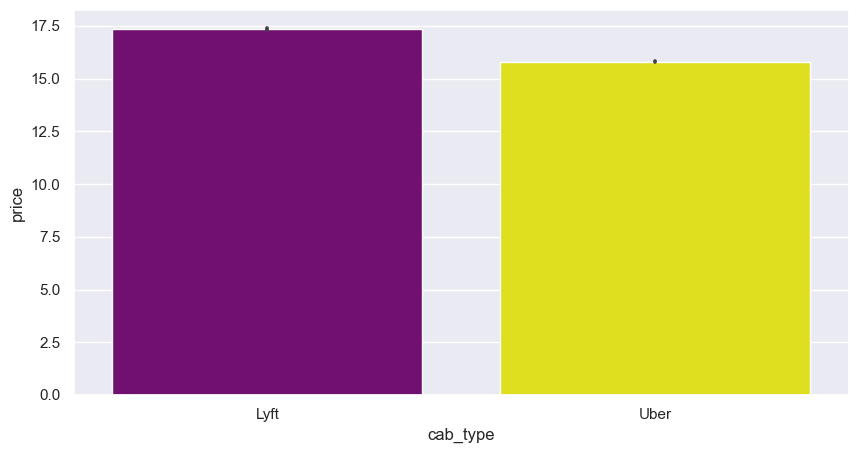

In [16]:
# Menampilkan Visualisasi dengan barplot
sns.set(rc={'figure.figsize':(10,5)}) #ukuran
cols = ['purple','yellow'] #warna
sns.barplot(x='cab_type', y='price', palette= cols, data=clean_data) #kolom yang digunakan

In [17]:
# Menggrouping beberapa kolom untuk menghitung jumlah dan rata - rata
print(clean_data.groupby('cab_type').agg(jumlah_price=('price', 'sum')),'\n')
print(clean_data.groupby('cab_type').agg(mean_price=('price', 'mean')))

          jumlah_price
cab_type              
Lyft        5333957.98
Uber        5221435.00 

          mean_price
cab_type            
Lyft       17.351396
Uber       15.795343


>**Kesimpulan :**
Berdasarkan visualisasi barplot dan perhitungan, Lyft memiliki jumlah pendapatan = 5.333.957$ dan rata - rata = 17$ dibandingkan dengan Uber jumlah pendapatan = 5.221.435$ dan rata - rata = 15$,
Perbandingannya tidak terlalu signifikan. 

### 2. Apakah jam berpengaruh terhadap banyaknya pendapatan ?

In [18]:
# membuat sebuah function untuk visualisasi dengan plot bar dan menghitung jumlah unique value
def plot_bar(groupby_column):
    df1 =clean_data.groupby(groupby_column).size().reset_index(name="price")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="price", color=groupby_column, barmode="group")
    print(df1)
    fig1.show()

In [19]:
# visualisasi kolom hour
plot_bar('hour')

    hour  price
0      0  29872
1      1  26310
2      2  26323
3      3  25530
4      4  26125
5      5  22995
6      6  25147
7      7  22930
8      8  22337
9      9  26673
10    10  27918
11    11  27946
12    12  28017
13    13  27977
14    14  27976
15    15  27868
16    16  27972
17    17  28075
18    18  27958
19    19  25410
20    20  24620
21    21  25549
22    22  27093
23    23  29355


>**Kesimpulan :**
Berdasarkan visualisasi total pendapatan terbanyak saat jam 0 dengan total sebanyak 29.872$, lalu diikuti dengan jam 23 dengan total sebanyak 29.355$ sehingga bisa disimpulkan pendapatan terbanyak saat di malam hari

### 3. Apakah hari perjalanan mempengaruhi banyaknya pendapatan ?

In [20]:
# visualisasi kolom day
plot_bar('day')

    day  price
0     1  41680
1     2  41298
2     3  41323
3     4  11627
4     9   1529
5    10   2534
6    13  35496
7    14  41344
8    15  41332
9    16  41359
10   17  41354
11   18  33329
12   26  29028
13   27  70135
14   28  67842
15   29  55222
16   30  41544


>**Kesimpulan :**
Berdasarkan visualisasi total pendapatan terbanyak saat tanggal 27 dengan total sebanyak 70.135$, lalu diikuti dengan tanggal 28 dengan total sebanyak 67.842$ sehingga bisa disimpulkan pendapatan terbanyak saat tanggal - tanggal tertentu dan di pengaruhi oleh bebrapa faktor.

### 4. Dibulan apakah pendapatan terbanyak ?

In [21]:
# visualisasi kolom month
plot_bar('month')

   month   price
0     11  263771
1     12  374205


>**Kesimpulan :**
Berdasarkan visualisasi hanya ada bulan 11 dan 12, tetapi total pendapatan terbanyak saat bulan 12 dengan total sebanyak 374.205$ 

### 5. Apakah jenis mobil mempengaruhi banyaknya pendapatan antara Uber dan Lyft?jika iya, Manakah pendapatan terbanyak antara Uber dan Lyft? 

<Axes: xlabel='price', ylabel='name'>

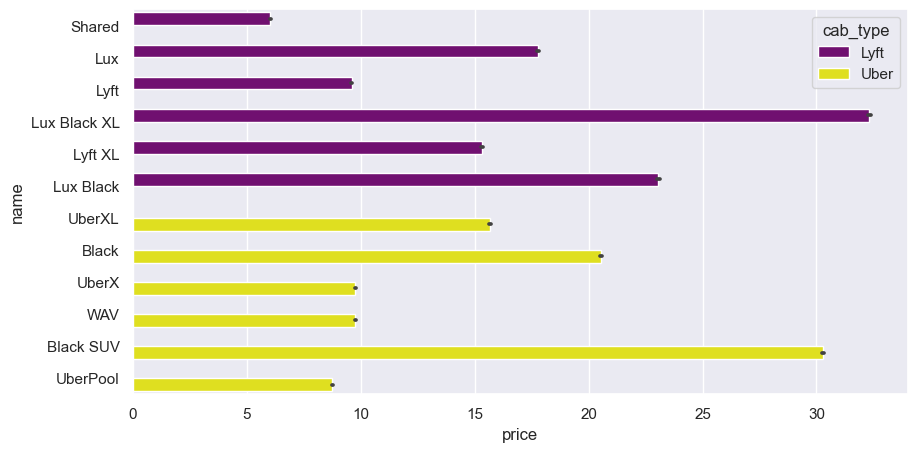

In [22]:
#Visualisasi barplot
sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(y='name', x='price', data=clean_data, hue='cab_type', palette= cols)

In [23]:
# Menampilkan jumlah dan rata - rata harga dari setiap jenis mobil
print(clean_data.groupby('name').agg(jumlah_price=('price', 'sum')),'\n')
print(clean_data.groupby('name').agg(mean_price=('price', 'mean')))

              jumlah_price
name                      
Black           1130758.00
Black SUV       1668679.50
Lux              910509.50
Lux Black       1181605.55
Lux Black XL    1656124.55
Lyft             492413.68
Lyft XL          784375.20
Shared           308929.50
UberPool         482184.00
UberX            537997.00
UberXL           863803.00
WAV              538013.50 

              mean_price
name                    
Black          20.523786
Black SUV      30.286763
Lux            17.771240
Lux Black      23.062468
Lux Black XL   32.324086
Lyft            9.610885
Lyft XL        15.309363
Shared          6.029893
UberPool        8.752500
UberX           9.765074
UberXL         15.678144
WAV             9.765019


>**Kesimpulan :**
Berdasarkan visualisasi terdapat jenis - jenis mobil antara Uber dan Lyft, mobil dengan jenis Black dengan tarif +- 21$ mendapatkan jumlah 1.130.758$ dan rata - rata 20$ sehingga bisa saya asumsikan Uber mendapatkan pendapatan terbanyak

## 5. Feature Engineering

**1. Analisis Korelasi**

In [24]:
#Memilih beberapa data
temperatur = clean_data[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh', 
                         'apparentTemperatureLow', 'temperatureLowTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'sunriseTime', 
                         'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime', 
                         'temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']]

In [25]:
data_temp = temperatur
data_temp.head().T

,0,1,2,3,4
temperature,4.234000e+01,4.358000e+01,3.833000e+01,3.438000e+01,3.744000e+01
apparentTemperature,3.712000e+01,3.735000e+01,3.293000e+01,2.963000e+01,3.088000e+01
temperatureHigh,4.368000e+01,4.730000e+01,4.755000e+01,4.503000e+01,4.218000e+01
temperatureLow,3.419000e+01,4.210000e+01,3.310000e+01,2.890000e+01,3.671000e+01
apparentTemperatureHigh,3.795000e+01,4.392000e+01,4.412000e+01,3.853000e+01,3.575000e+01
apparentTemperatureLow,2.739000e+01,3.620000e+01,2.911000e+01,2.620000e+01,3.029000e+01
temperatureLowTime,1.545048e+09,1.543298e+09,1.543403e+09,1.543579e+09,1.543478e+09
apparentTemperatureHighTime,1.544969e+09,1.543252e+09,1.543320e+09,1.543511e+09,1.543421e+09
apparentTemperatureLowTime,1.545044e+09,1.543291e+09,1.543392e+09,1.543576e+09,1.543460e+09
sunriseTime,1.544962e+09,1.543233e+09,1.543319e+09,1.543492e+09,1.543406e+09


<Axes: >

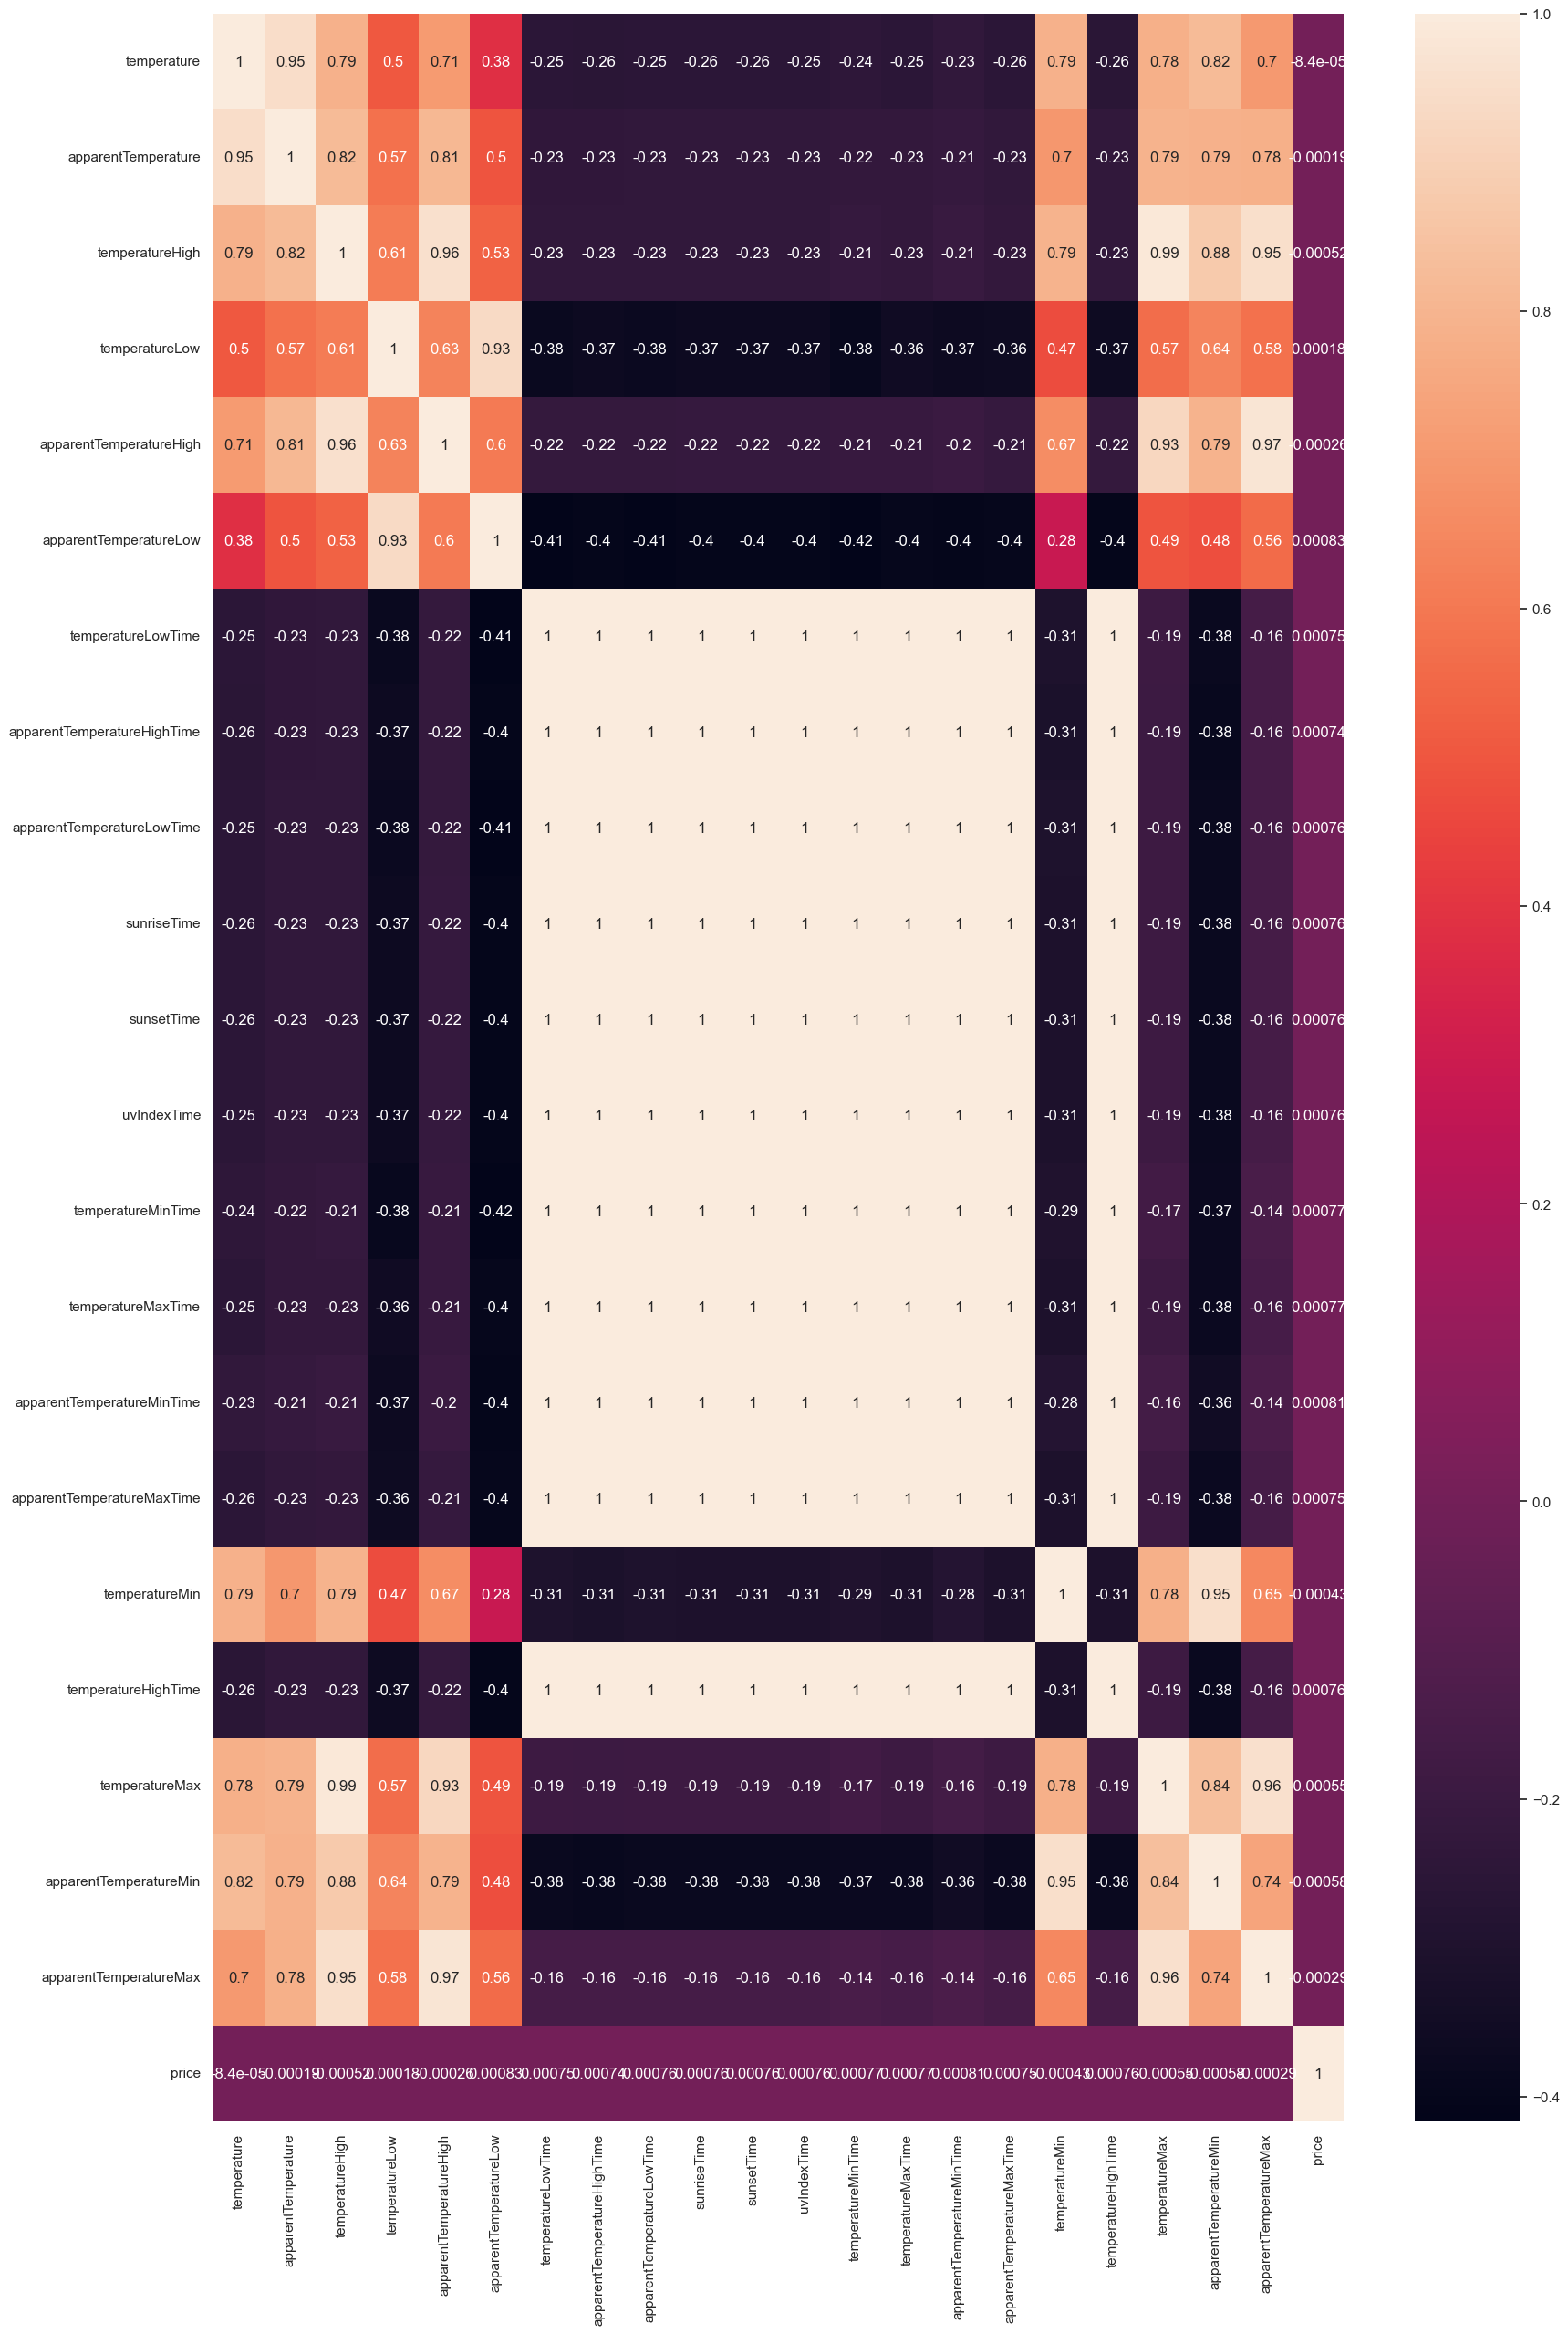

In [26]:
#Menampilkan visualisasi heatmap dengan metode Pearson
plt.figure(figsize=(20,30))
sns.heatmap(data_temp.corr(method='pearson'),annot=True)

>**Kesimpulan :**
Berdasarkan visualisasi saya menetapkan threshold 0.5 sampai 1 memiliki pengaruh terhadap price
1. `temperature` 0.7
2. `apparentTemperature` 0.78
3. `temperatureHigh` 0.95
4. `temperatureLow` 0.58
5. `apparentTemperatureHigh` 0.97
6. `apparentTemperatureHigh` 0.56
7. `temperatureMin` 0.65
8. `temperatureMax` 0.96
9. `apparentTemperatureMin` 0.74

In [27]:
# menghapus kolom, yang saya sudah cek korelasi karena menurut saya tidak terlalu membutuhkan
clean_data = clean_data.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh', 
                         'apparentTemperatureLow', 'temperatureLowTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'sunriseTime', 
                         'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime', 
                         'temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
clean_data.shape

(637976, 36)

In [28]:
# Memilih beberapa data
iklim = clean_data[['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']]

In [29]:
data_iklim = iklim
data_iklim.head().T

,0,1,2,3,4
precipIntensity,0.000000e+00,1.299000e-01,0.000000e+00,0.000000e+00,0.000000e+00
precipProbability,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
humidity,6.800000e-01,9.400000e-01,7.500000e-01,7.300000e-01,7.000000e-01
windSpeed,8.660000e+00,1.198000e+01,7.330000e+00,5.280000e+00,9.140000e+00
windGust,9.170000e+00,1.198000e+01,7.330000e+00,5.280000e+00,9.140000e+00
windGustTime,1.545016e+09,1.543291e+09,1.543334e+09,1.543514e+09,1.543446e+09
dewPoint,3.270000e+01,4.183000e+01,3.110000e+01,2.664000e+01,2.861000e+01
pressure,1.021980e+03,1.003970e+03,9.922800e+02,1.013730e+03,9.983600e+02
windBearing,5.700000e+01,9.000000e+01,2.400000e+02,3.100000e+02,3.030000e+02
cloudCover,7.200000e-01,1.000000e+00,3.000000e-02,0.000000e+00,4.400000e-01


<Axes: >

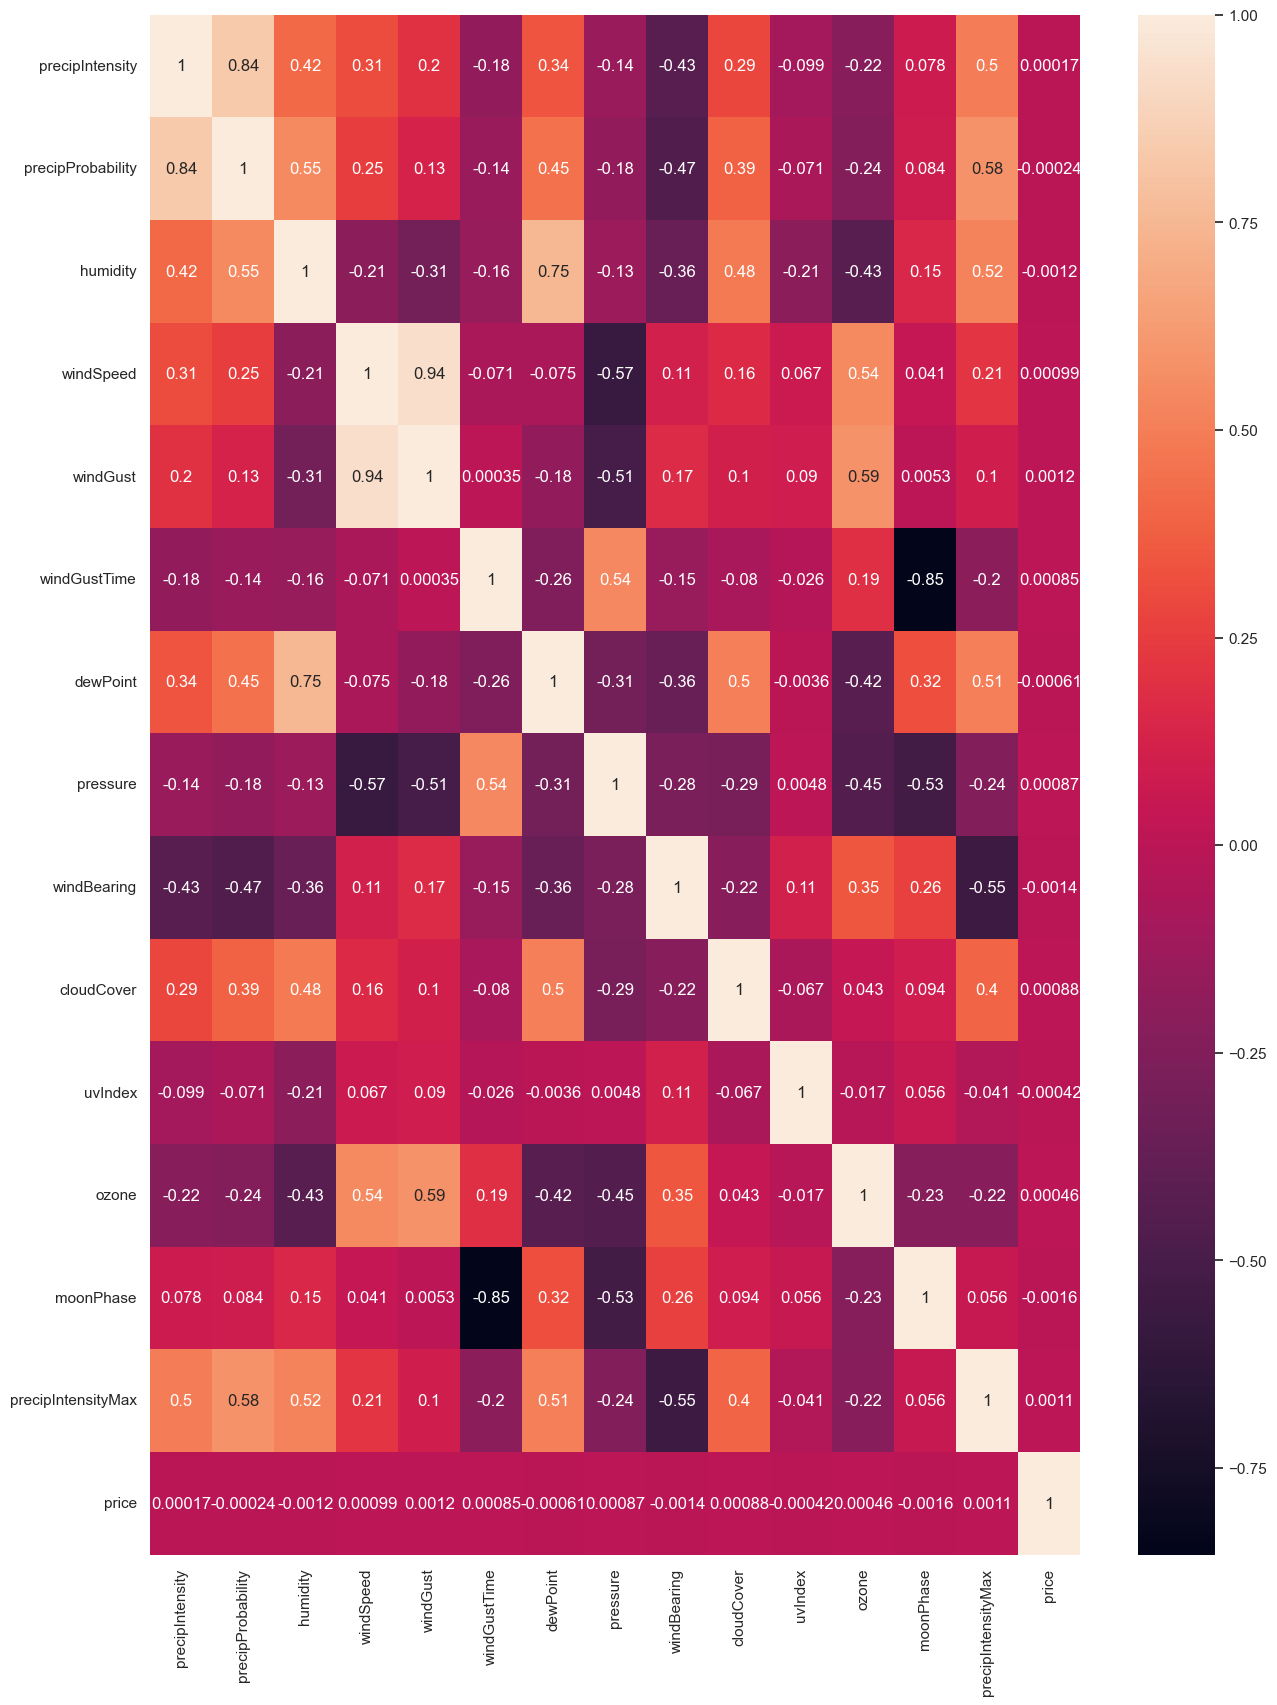

In [30]:
plt.figure(figsize=(15,20))
sns.heatmap(data_iklim.corr(method='pearson'),annot=True)

In [31]:
# Menghapus data yang tidak dibutuhkan
clean_data = clean_data.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
clean_data.shape

(637976, 22)

In [32]:
# Menampilkan sisa kolom
clean_data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'short_summary', 'long_summary', 'visibility', 'icon', 'visibility.1'],
      dtype='object')

In [33]:
# Mengubah tipe data
clean_data['surge_multiplier'] = clean_data['surge_multiplier'].astype("object")

In [34]:
# Menampilkan kolom dengan type data object dan category serta masing - masing value unique pada kolom
category_col = clean_data.select_dtypes(include=['object', 'category']).columns.tolist()
for column in clean_data[category_col]:
    print(f'{column} : {clean_data[column].unique()}')
    print()

id : ['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '633a3fc3-1f86-4b9e-9d48-2b7132112341'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']

datetime : ['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 05:00:04' '2018-12-03 16:48:07' '2018-12-02 05:07:57']

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a

In [35]:
# Membuat variabel kategorikal
cat = clean_data[['source', 'surge_multiplier', 'destination', 'cab_type', 'name', 'short_summary', 'long_summary', 'visibility', 'icon', 'visibility.1', 'price']]

data_cat = cat
data_cat.head()

,source,surge_multiplier,destination,cab_type,name,short_summary,long_summary,visibility,icon,visibility.1,price
0,Haymarket Square,1.0,North Station,Lyft,Shared,Mostly Cloudy,Rain throughout the day.,10.000,partly-cloudy-night,10.000,5.0
1,Haymarket Square,1.0,North Station,Lyft,Lux,Rain,"Rain until morning, starting again in the eve...",4.786,rain,4.786,11.0
2,Haymarket Square,1.0,North Station,Lyft,Lyft,Clear,Light rain in the morning.,10.000,clear-night,10.000,7.0
3,Haymarket Square,1.0,North Station,Lyft,Lux Black XL,Clear,Partly cloudy throughout the day.,10.000,clear-night,10.000,26.0
4,Haymarket Square,1.0,North Station,Lyft,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,10.000,partly-cloudy-night,10.000,9.0


In [39]:
# Melakukan label encode pada data kategori
lab_encode = preprocessing.LabelEncoder()

data_cat_encode= data_cat.copy()
for col in data_cat_encode.select_dtypes(include='O').columns:
    data_cat_encode[col]=lab_encode.fit_transform(data_cat_encode[col])

In [40]:
# Menampilkan value dari kolom kategori yang sudah di encode
data_cat_encode

,source,surge_multiplier,destination,cab_type,name,short_summary,long_summary,visibility,icon,visibility.1,price
0,5,0,7,0,7,4,9,10.000,5,10.000,5.0
1,5,0,7,0,2,8,10,4.786,6,4.786,11.0
2,5,0,7,0,5,0,2,10.000,1,10.000,7.0
3,5,0,7,0,4,0,6,10.000,1,10.000,26.0
4,5,0,7,0,6,6,4,10.000,5,10.000,9.0
...,...,...,...,...,...,...,...,...,...,...,...
693065,11,0,6,1,11,6,1,9.785,5,9.785,9.5
693066,11,0,6,1,10,6,1,9.785,5,9.785,13.0
693067,11,0,6,1,9,6,1,9.785,5,9.785,9.5
693069,11,0,6,1,1,6,1,9.785,5,9.785,27.0


<Axes: >

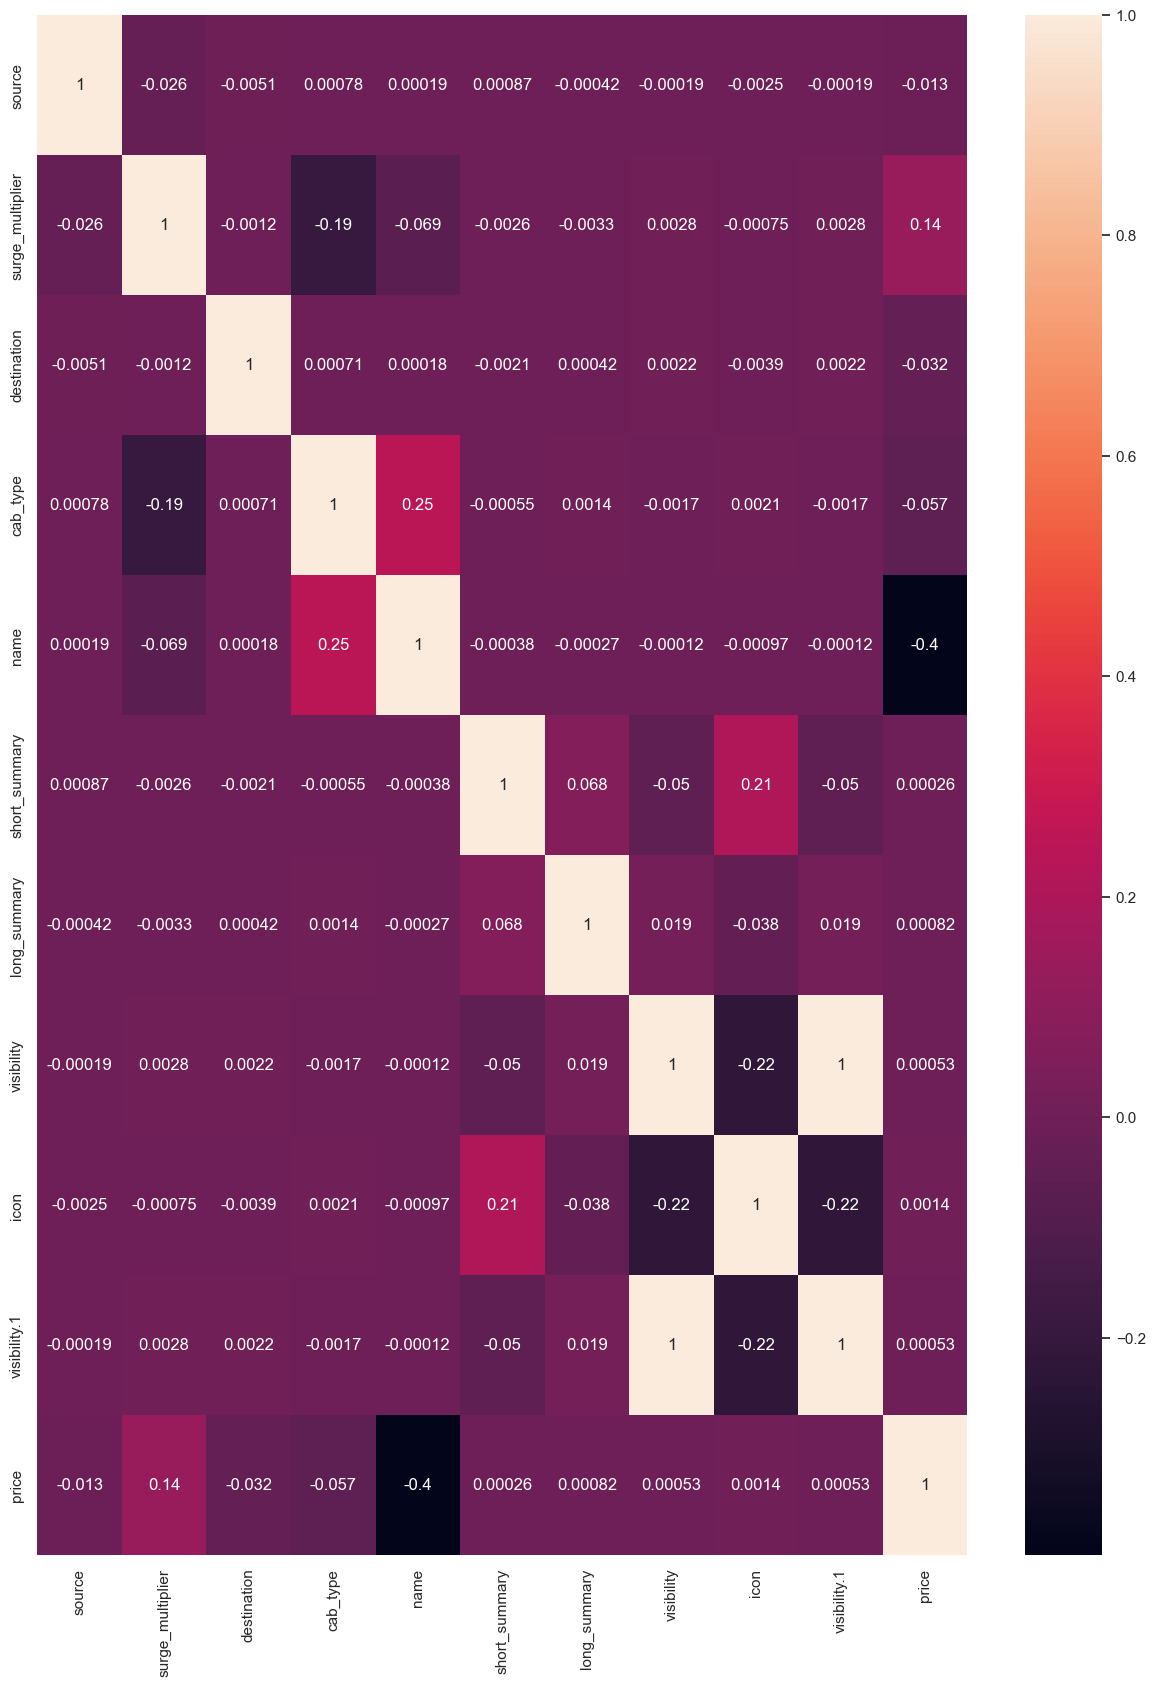

In [41]:
# Visualisasi heatmap data kategorikal dengan method kendall
plt.figure(figsize=(15,20))
sns.heatmap(data_cat_encode.corr(method='kendall'),annot=True)

#### Feature Selection

Memilih beberapa kolom yang ingin digunakan dengan menurut intuisi yang tidak berkaitan dengan target

In [42]:
clean_data = clean_data.drop(['hour', 'day', 'month', 'source', 'destination', 'short_summary', 'latitude', 'longitude', 
                              'id','timestamp','datetime','timezone','product_id','long_summary','visibility','icon','visibility.1'],axis=1)

**2. Analisa Cardinality**

In [43]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          637976 non-null  object 
 1   name              637976 non-null  object 
 2   price             637976 non-null  float64
 3   distance          637976 non-null  float64
 4   surge_multiplier  637976 non-null  object 
dtypes: float64(2), object(3)
memory usage: 29.2+ MB


In [44]:
print('Number of categories in the variable Cab Type         : {}'.format(len(clean_data.cab_type.unique())))
print('Number of categories in the variable Name             : {}'.format(len(clean_data.name.unique())))
print('Number of categories in the variable Surge Multiplier : {}'.format(len(clean_data.surge_multiplier.unique())))

Number of categories in the variable Cab Type         : 2
Number of categories in the variable Name             : 12
Number of categories in the variable Surge Multiplier : 7


>**Kesimpulan**
Variabel Cab Type hanya berisi 2 kategori (Low Cardinality), sedangkan variabel Source, Destination, Name, berisi 12 kategori (High Cardinality) dan Variabel Surge Multiplier berisi 7 kategori threshold nya tidak begitu jauh dengan High Cardinality

**3.Handling Outliers**

In [45]:
#Splitting between X and y

X = clean_data.drop(['price'], axis = 1)
y = clean_data['price']
y

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693065     9.5
693066    13.0
693067     9.5
693069    27.0
693070    10.0
Name: price, Length: 637976, dtype: float64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

print('Train size', X_train.shape)
print('Test size', X_test.shape)
X_train

Train size (510380, 4)
Test size (127596, 4)


,cab_type,name,distance,surge_multiplier
43425,Uber,Black SUV,3.53,1.0
478686,Lyft,Lyft XL,2.26,1.0
361744,Uber,Black SUV,2.48,1.0
57594,Uber,Black SUV,3.01,1.0
511129,Uber,Black SUV,2.84,1.0
...,...,...,...,...
560871,Uber,WAV,4.72,1.0
136518,Lyft,Lux Black XL,1.18,1.0
534340,Lyft,Lyft XL,1.72,1.0
322597,Lyft,Lux Black XL,3.18,1.0


In [47]:
print('Distribusi kolom Distance         : ', X_train['distance'].skew())

Distribusi kolom Distance         :  0.8139098370148588


>**Kesimpulan**
Normal Distribusi memiliki ketentuan dari -0,5 sampai 0,5. Diluar dari ketentuan merupakan Skewed Distribusi. Sehingga kolom 

1. `Hour` termasuk Normal Distribusi

2. `Day` termasuk Normal Distribusi

3. `Month` termasuk Normal Distribusi

4. `Distance` termasuk Skewed Distribusi

In [48]:
# Dibawah merupakan fungsi untuk membuat Histogram dan Boxplot
def diagnostic_plots(df, variable):
    # Define ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Distance Skewed


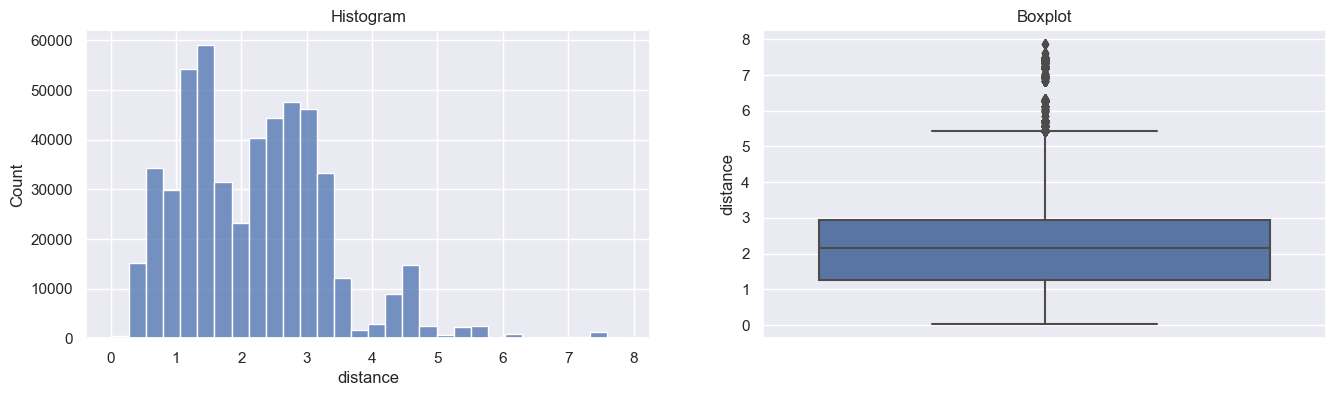

In [49]:
# Visualisasi untuk yang Skewed saja
print('Distance Skewed')
diagnostic_plots(X_train, 'distance')

#### - Skewed Distribusi

In [50]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [51]:
# Identify outliers in `Fare` in the titanic dataset. Lets look again for extreme values using IQR * 3

upper_boundary_distance, lower_boundary_distance = find_skewed_boundaries(X_train, 'distance', 1.5)
print(upper_boundary_distance, lower_boundary_distance)

5.42 -1.2200000000000002


In [52]:
print('Persentase Distance  : {}%'.format(len(X_train[X_train['distance'] > upper_boundary_distance])/len(X_train) * 100))

Persentase Distance  : 1.0417727967396841%


In [53]:
# caping outlier

winsoriser_distance = Winsorizer(capping_method='iqr', # IQR untuk distribusi skewed
                             tail='both', #capping 2 sisi outlier
                             fold=1.5, # rumus iqr
                             variables=['distance'])

X_train_capped = winsoriser_distance.fit_transform(X_train)
X_test_capped = winsoriser_distance.transform(X_test)

Distance - Sebelum Capping


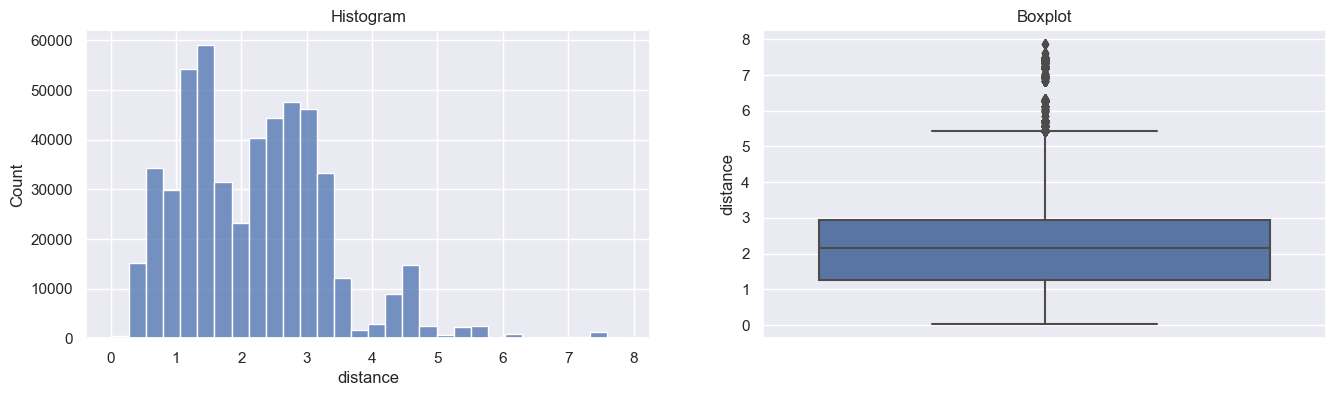


Distance - Setelah Capping


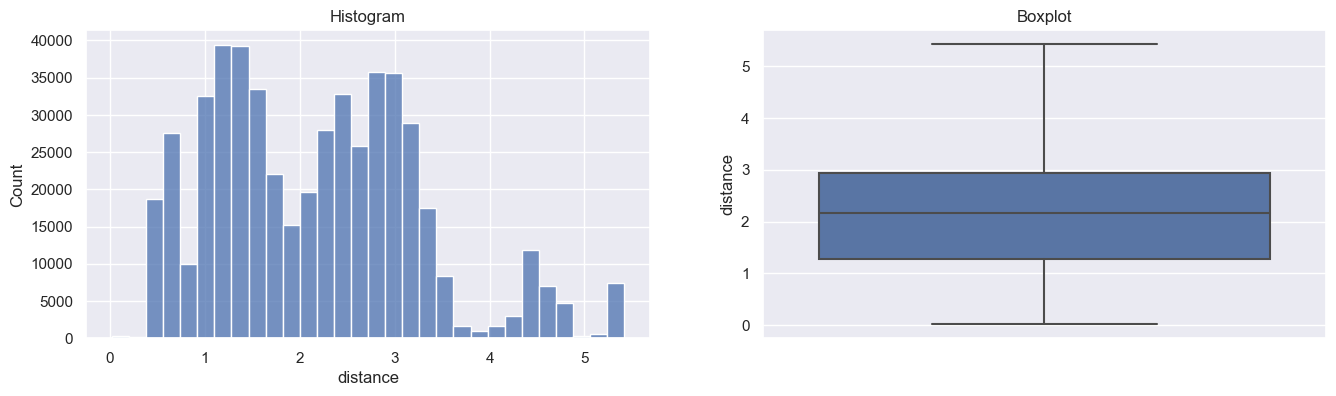


Distance - Sebelum Capping


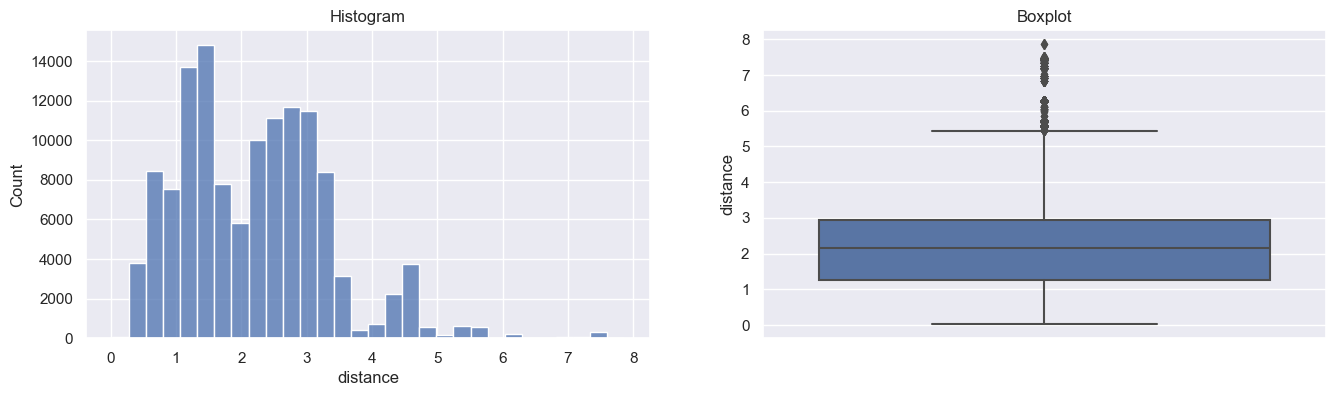


Distance - Setelah Capping


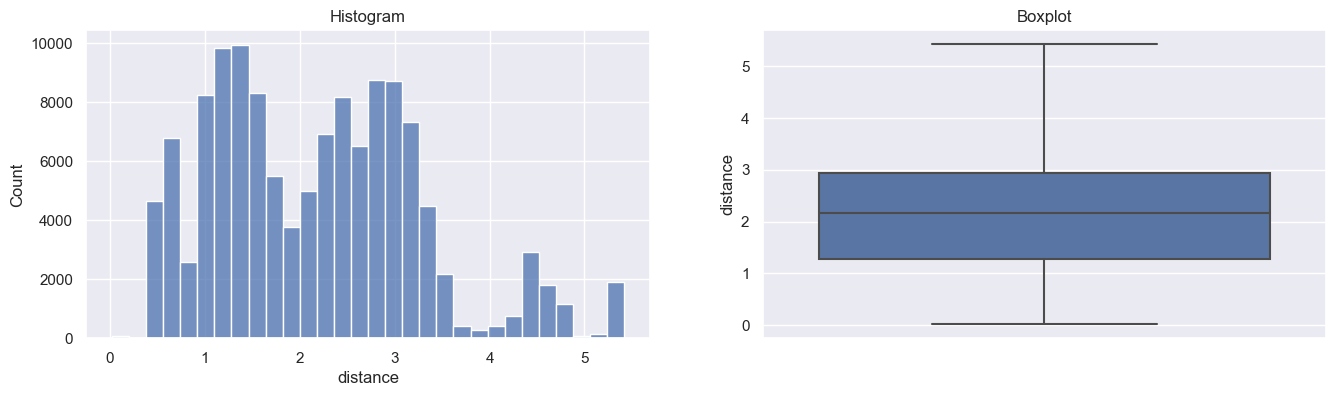

In [54]:
# Check the distribution before and after capping

print('Distance - Sebelum Capping')
diagnostic_plots(X_train, 'distance')

print('\nDistance - Setelah Capping')
diagnostic_plots(X_train_capped, 'distance')

print('\nDistance - Sebelum Capping')
diagnostic_plots(X_test, 'distance')

print('\nDistance - Setelah Capping')
diagnostic_plots(X_test_capped, 'distance')

**4. Handling Missing Value**

Missing value bisa menghapus data secara baris atau dengan cara imputasi value Nan dengan Mean, Median, Arbitrary ataupun Flagging

In [55]:
X_train_capped.isnull().sum()

cab_type            0
name                0
distance            0
surge_multiplier    0
dtype: int64

In [56]:
X_test_capped.isnull().sum()

cab_type            0
name                0
distance            0
surge_multiplier    0
dtype: int64

In [57]:
y_train.isnull().sum()

0

In [58]:
y_train.isnull().sum()

0

In [59]:
#Split numeric and categorical columns

num_col = X_train_capped.select_dtypes(include = np.number).columns.tolist()
cat_col = X_train_capped.select_dtypes(include = ['object']).columns.tolist()

print('Numerical columns : ', num_col)
print('Categorical columns : ', cat_col)

Numerical columns :  ['distance']
Categorical columns :  ['cab_type', 'name', 'surge_multiplier']


In [60]:
#Split train-set and test-set based on column types

X_train_num = X_train_capped[num_col]
X_train_cat = X_train_capped[cat_col]

X_test_num = X_test_capped[num_col]
X_test_cat = X_test_capped[cat_col]

X_train_num

,distance
43425,3.53
478686,2.26
361744,2.48
57594,3.01
511129,2.84
...,...
560871,4.72
136518,1.18
534340,1.72
322597,3.18


In [61]:
# Melihat skewness dari distance
print(X_train_capped['distance'].skew())
print(X_test_capped['distance'].skew())

0.5869461312951716
0.5935322383686588


#### Feature Scaling

In [62]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.65      ],
       [0.41481481],
       [0.45555556],
       ...,
       [0.31481481],
       [0.58518519],
       [0.27592593]])

#### Feature Encoding

In [63]:
# Encoding menggunakan OneHotEncoder
category_ohe = ['name','cab_type']
ohe = OneHotEncoder(sparse=False)

encode_train = ohe.fit_transform(X_train_cat[['name','cab_type']])
encode_test = ohe.transform(X_test_cat[['name','cab_type']])
surge_multiplier_train = X_train_cat[['surge_multiplier']]
surge_multiplier_test = X_test_cat[['surge_multiplier']]

In [74]:
#Concate columns

X_train_final = np.concatenate([encode_train, surge_multiplier_train, X_train_num_scaled], axis = 1)
X_test_final = np.concatenate([encode_test, surge_multiplier_test, X_test_num_scaled], axis = 1)

X_test_final

array([[0.0, 0.0, 0.0, ..., 0.0, 2.0, 0.2740740740740741],
       [0.0, 0.0, 0.0, ..., 0.0, 1.0, 0.20555555555555552],
       [0.0, 0.0, 0.0, ..., 1.0, 1.0, 0.23703703703703702],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 1.0, 0.4444444444444444],
       [0.0, 0.0, 0.0, ..., 0.0, 1.0, 0.5944444444444444],
       [0.0, 0.0, 1.0, ..., 0.0, 1.0, 0.1685185185185185]], dtype=object)

In [75]:
kolom_dari_ohe = ohe.get_feature_names_out(input_features= category_ohe)
kolom_lain = ['surge_multiplier', 'distance']
namakolom = np.append(kolom_dari_ohe,kolom_lain)

X_train_final_df = pd.DataFrame(X_train_final, columns = namakolom)
X_test_final_df = pd.DataFrame(X_test_final, columns = namakolom)
X_train_final_df

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber,surge_multiplier,distance
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.65
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.414815
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.455556
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.553704
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.522222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.87037
510376,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.214815
510377,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.314815
510378,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.585185


## 6. Model Definition

In [76]:
model = LinearRegression()

## 7. Model Training

In [77]:
model.fit(X_train_final,y_train)

LinearRegression()

In [78]:
#predict Train dan Test

y_pred_train = model.predict(X_train_final)
y_pred_test = model.predict(X_test_final)
y_pred_train

array([34.19042969, 14.83105469, 31.16503906, ..., 13.27539062,
       34.50195312, 29.69042969])

## 8. Model Evaluation

In [79]:
print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

print('mape train = ', np.round(mean_absolute_percentage_error(y_train, y_pred_train)*100))
print('mape test = ', np.round(mean_absolute_percentage_error(y_test, y_pred_test)*100))

MAE train =  1.7805800800384028
MAE test =  1.782307146739024
MSE train =  6.28351959887158
MSE test =  6.337598168934777
RMSE train =  2.5066949552890514
RMSE test =  2.5174586727362134
r2score train =  0.927679330855567
r2score test =  0.9273052480662906
mape train =  14.0
mape test =  14.0


Dari hasil evaluasi model yang Anda berikan, kita dapat membuat beberapa kesimpulan:

1. **Mean Absolute Error (MAE)**:
   - MAE train = 1.7806
   - MAE test = 1.7823
   - Kesimpulan: MAE pada data training dan data testing hampir sama, menunjukkan bahwa model memiliki kinerja yang konsisten dalam memprediksi nilai sekitar 1.78 unit dari nilai sebenarnya.

2. **Mean Squared Error (MSE)**:
   - MSE train = 6.2835
   - MSE test = 6.3376
   - Kesimpulan: MSE pada data training dan data testing juga hampir sama, menunjukkan bahwa model memiliki tendensi untuk memiliki kesalahan yang serupa dalam memprediksi nilai, yaitu sekitar 6.28 dan 6.34 unit kuadrat dari nilai sebenarnya.

3. **Root Mean Squared Error (RMSE)**:
   - RMSE train = 2.5067
   - RMSE test = 2.5175
   - Kesimpulan: RMSE pada data training dan data testing juga hampir sama, menunjukkan bahwa model memiliki kesalahan akar kuadrat rata-rata sekitar 2.51 unit dari nilai sebenarnya.

4. **R-squared (R2) Score**:
   - R2 score train = 0.9277
   - R2 score test = 0.9273
   - Kesimpulan: Nilai R2 yang tinggi (mendekati 1) menunjukkan bahwa model mampu menjelaskan variasi yang signifikan dalam data. R2 score pada data training dan data testing hampir sama, menunjukkan bahwa model memiliki kinerja yang baik dan tidak overfitting.

5. **Mean Absolute Percentage Error (MAPE)**:
   - MAPE train = 14.0%
   - MAPE test = 14.0%
   - Kesimpulan: MAPE pada data training dan data testing adalah 14.0%, yang mengindikasikan bahwa rata-rata kesalahan relatif model sekitar 14% dari nilai sebenarnya.

Secara keseluruhan, model Anda tampaknya memiliki kinerja yang baik dengan MAE, MSE, RMSE, dan R2 score yang rendah, serta MAPE yang relatif rendah. Selain itu, tidak ada perbedaan besar antara hasil evaluasi pada data training dan data testing, menunjukkan bahwa model tidak mengalami overfitting atau underfitting. Namun, penting untuk mempertimbangkan konteks aplikasi spesifik dan tujuan model dalam menilai apakah tingkat kesalahan yang ditemukan sudah dapat diterima atau perlu ditingkatkan lebih lanjut.

## 9. Model Saving

In [81]:
# Untuk menyimpan model kita menggunakan module pickle

with open('model_scaler1.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1) # ini agar di ipynb data inference kita tinggal transform saja

with open('model_encoder1.pkl', 'wb') as file_2:
  pickle.dump(ohe, file_2) # ini agar di ipynb data inference kita tinggal transform saja

with open('model_lin_reg1.pkl', 'wb') as file_3:
  pickle.dump(model, file_3) # ini agar di ipynb data inference kita tinggal transform saja

## 10. Model Inference

Terdapat pada inference_machine_learning.ipynb yang saya buat

## 11. Pengambilan Kesimpulan


1. Setelah dicek keterhubungannya dengan Harga atau tarif taksi Uber dan Lyft, ternyata ada beberapa faktor yang secara signifikan berpengaruh untuk terhadap harga / tarif perjalanan. Diantara lain , Jarak Perjalanan yang ditempuh ,Jam pada saat pemesanan,faktor pengganda tarif, Jenis taksi yang digunakan, dan Tipe Mobil yang digunakan.

2. Pada kondisi ini metode paling tepat untuk handle missing value di Target price adalah dengan mendrop missing value

3. Sedangkan saat Encoding, OneHotEncoding menghasilkan hasil yang jauh lebih akurat dibandingkan menggunakan LabelEncoding

4. Permodelan yang dibuat disini sudah dapat memprediksi dengan akurat tarif perjalanan taksi Uber dan Lyft dengan berdasarkan faktor - faktor yang sudah disebutkan diatas. Dapat dikatakan akurat karena nilai R-Squared nya sebesar 0.92 atau dengan kata lain tingkat keakuratannya sebesar 92%

5. Hasil permodelan juga dapat dikatakan normal , tidak mengalami overfit atau underfit, dapat dilihat dari nilai RSquared train dan RSquared nilainya relatif sama (selisihnya 0,002)